## For this problem our main aim will be to develop models starting from logistic regression and get te best model with high recall and precision values. And from the best model we trained we will see which feature is showing high importance. We have used cross validation and ROC-AUC curve to see model performance.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dups=df.duplicated()
dups.sum()

1081

<Axes: >

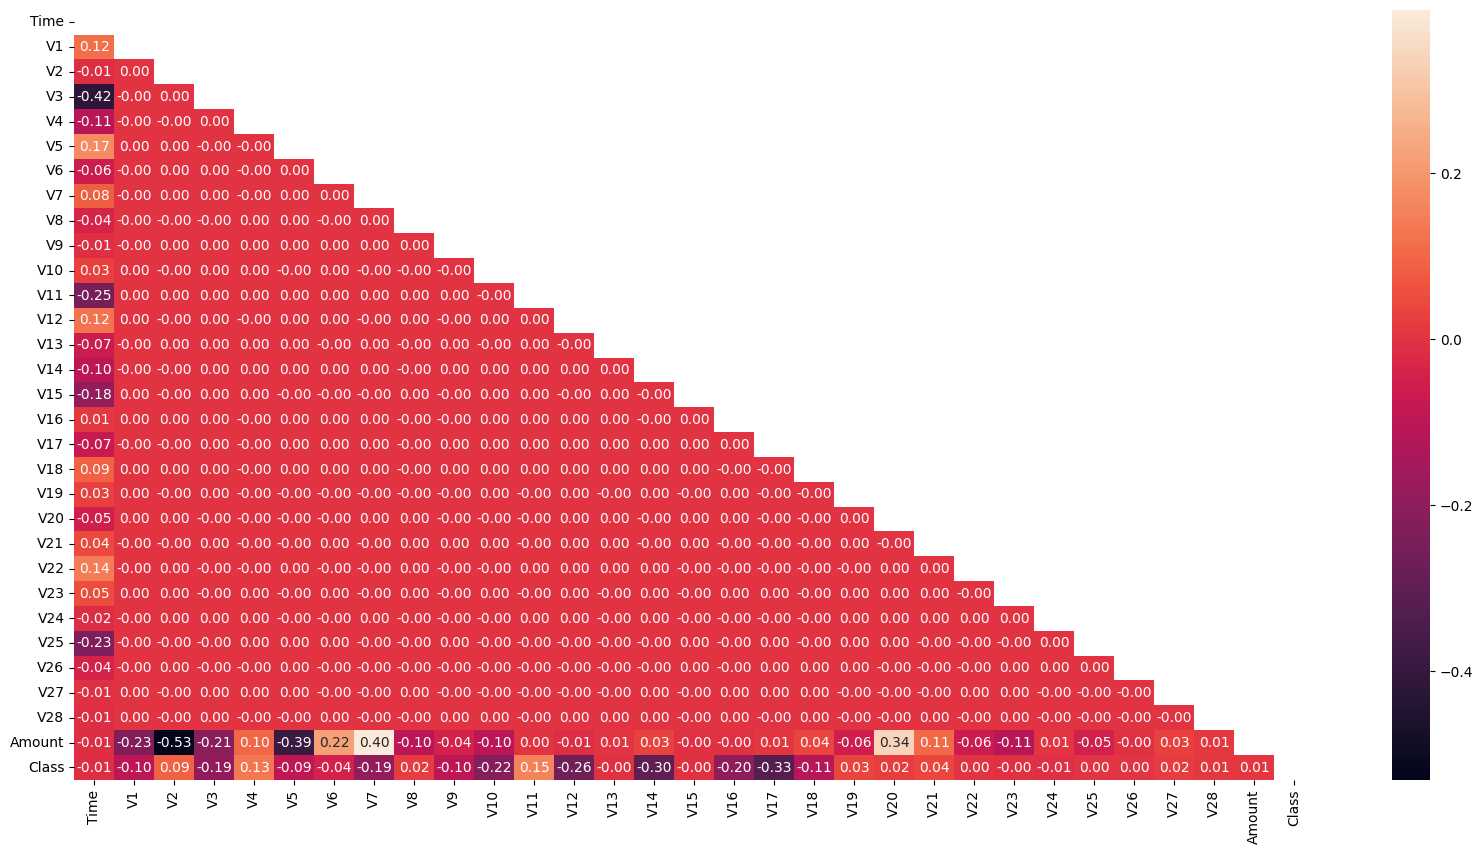

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
matrix=np.triu(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f',mask=matrix)

In [7]:
## Deleting duplicated
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [9]:
dups=df.duplicated()
dups.sum()

0

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
x=df.drop(columns='Class', axis=1)
y=df.pop('Class')

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
model=LogisticRegression()

In [14]:
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred=model.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.69      0.65      0.67       125

    accuracy                           1.00     85118
   macro avg       0.84      0.82      0.83     85118
weighted avg       1.00      1.00      1.00     85118



In [16]:
from collections import Counter
counter=Counter(y)
counter

Counter({0: 283253, 1: 473})

In [17]:
#### Using SMOTE in order to balance highly ibalance data
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
x1,y1=oversample.fit_resample(x,y)

In [18]:
from collections import Counter
counter=Counter(y1)
counter

Counter({0: 283253, 1: 283253})

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=1)

In [20]:
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=model.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     84918
           1       0.97      0.95      0.96     85034

    accuracy                           0.96    169952
   macro avg       0.96      0.96      0.96    169952
weighted avg       0.96      0.96      0.96    169952



In [22]:
y_pred_train=model.predict(x_train)
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    198335
           1       0.97      0.95      0.96    198219

    accuracy                           0.96    396554
   macro avg       0.96      0.96      0.96    396554
weighted avg       0.96      0.96      0.96    396554



In [23]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[82202  2716]
 [ 4577 80457]]


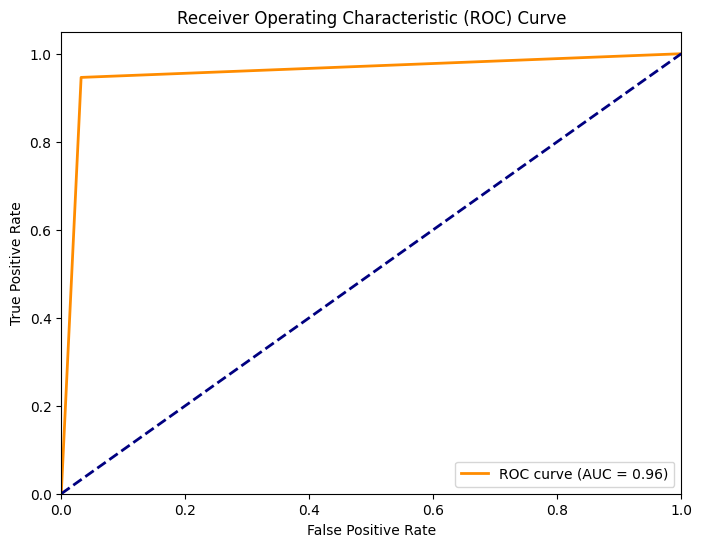

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(model, x1, y1, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Mean Accuracy: 0.97
Standard Deviation: 0.00


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree=DecisionTreeClassifier()

In [28]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dtree.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84918
           1       1.00      1.00      1.00     85034

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [30]:
y_pred_train=dtree.predict(x_train)
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198335
           1       1.00      1.00      1.00    198219

    accuracy                           1.00    396554
   macro avg       1.00      1.00      1.00    396554
weighted avg       1.00      1.00      1.00    396554



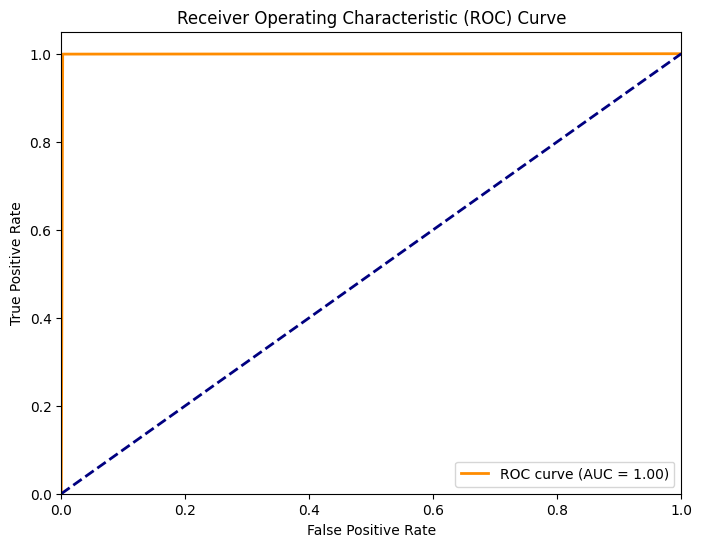

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:


num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dtree, x1, y1, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00
Mean Accuracy: 1.00
Standard Deviation: 0.00


In [33]:
#overfitting pruning decision tree
dtree=DecisionTreeClassifier(max_depth=8)


In [34]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [35]:
y_pred=dtree.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     84918
           1       0.99      0.98      0.98     85034

    accuracy                           0.98    169952
   macro avg       0.98      0.98      0.98    169952
weighted avg       0.98      0.98      0.98    169952



In [36]:
y_pred_train=dtree.predict(x_train)
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    198335
           1       0.99      0.98      0.98    198219

    accuracy                           0.98    396554
   macro avg       0.98      0.98      0.98    396554
weighted avg       0.98      0.98      0.98    396554



In [37]:

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dtree, x1, y1, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')

Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.98
Fold 4: Accuracy = 0.98
Fold 5: Accuracy = 0.98
Mean Accuracy: 0.98


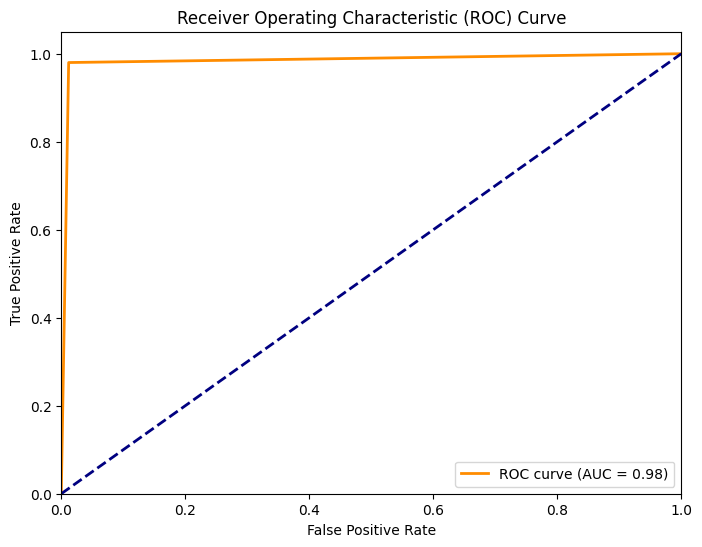

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
feature_importances = dtree.feature_importances_

# Create a DataFrame for easier visualization (optional but helpful)
importance_df = pd.DataFrame({'Feature': x1.columns, 'Importance': feature_importances})

# Sort the features by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [40]:
importance_df

,Feature,Importance
14,V14,0.845512
4,V4,0.044420
17,V17,0.032682
12,V12,0.018738
3,V3,0.007769
0,Time,0.007735
13,V13,0.004619
29,Amount,0.004240
23,V23,0.004223
11,V11,0.004095


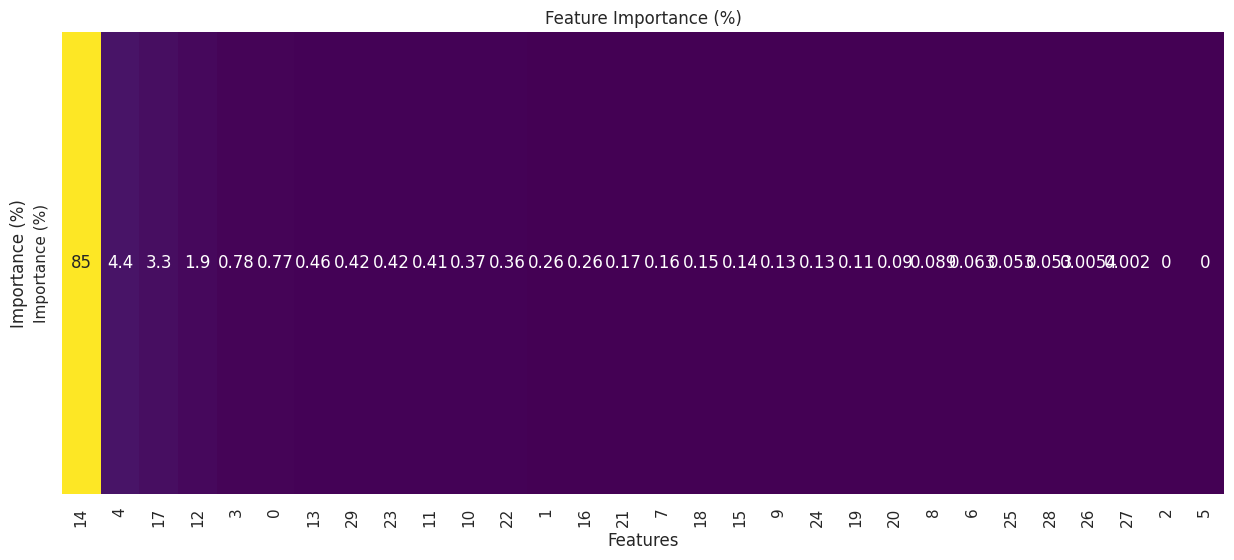

In [41]:


importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100




plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.heatmap(importance_df[['Importance (%)']].transpose(), cmap='viridis', annot=True, cbar=False)
plt.title('Feature Importance (%)')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [42]:
coefficients = model.coef_
feature_importancel = abs(coefficients[0])
sorted_indices = feature_importancel.argsort()[::-1]

cm=x1.columns

sorted_feature_names = [cm[i] for i in sorted_indices]

In [43]:
sorted_feature_names

['V14',
 'V3',
 'V17',
 'V12',
 'V10',
 'V7',
 'V4',
 'V1',
 'V16',
 'V11',
 'V2',
 'V5',
 'V9',
 'V18',
 'V6',
 'V8',
 'V19',
 'V21',
 'V20',
 'V27',
 'V24',
 'V15',
 'V22',
 'V13',
 'V28',
 'V23',
 'V26',
 'V25',
 'Amount',
 'Time']

#### Amount and time are very insignificant feaure for both logistic regression and decision tree. For both V14 is important feature for both the models. Other features have no significant iportance for decision tree model.